# Лабораторная работа 2
> Выполнена студентом: **Гришин Е.В. 22ВВИм2**

**Задание:** Реализация процедуры эквализации изображения
$$
{\rm LUT}[i] = 255 \cdot  \frac{\sum\limits_{j=1}^i \textrm{Hist}[j]} {\sum\limits_{j=1}^{255} \textrm{Hist}[j]},
$$


##### Установка OpenCV для контейнеров

```bash
pip install opencv-python
apt update && apt install ffmpeg libsm6 libxext6 -y
```

## Импорт библиотек, загрузка изображения

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np

values_range = [0, 256]
original_image = cv.imread('images/lenna_bad.png')
rgb_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

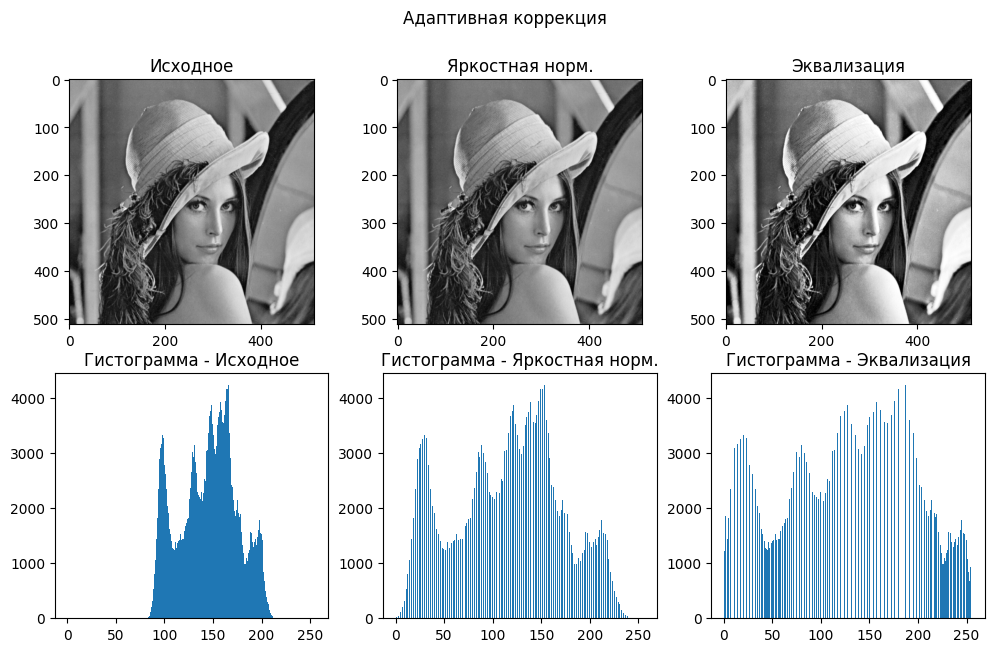

In [8]:
# Яркостная нормализация
bright_normalize = lambda i: (i - np.min(i)) / (np.max(i) - np.min(i)) * 255
normalized_image = bright_normalize(gray_image)

# Эквализация
# Вычисление гистограммы изображения
hist = cv.calcHist([gray_image], [0], None, [256], values_range)

# Инициализация LUT
lut = np.vectorize(lambda i: 255 * np.sum(hist[0:i]) / np.sum(hist[0:255]))
equalized_image = lut(gray_image)

gs = plt.GridSpec(2, 3)
plt.figure(figsize=(12, 7))
plt.suptitle("Адаптивная коррекция")

# Изображения
plt.subplot(gs[0])
plt.title("Исходное")
plt.imshow(gray_image, cmap='gray')

plt.subplot(gs[1])
plt.title("Яркостная норм.")
plt.imshow(normalized_image, cmap='gray')

plt.subplot(gs[2])
plt.title("Эквализация")
plt.imshow(equalized_image, cmap='gray')

plt.subplot(gs[3])
plt.title("Гистограмма - Исходное")
plt.hist(gray_image.reshape(-1), 256, values_range)

plt.subplot(gs[4])
plt.title("Гистограмма - Яркостная норм.")
plt.hist(normalized_image.reshape(-1), 256, values_range)

plt.subplot(gs[5])
plt.hist(equalized_image.reshape(-1), 256, values_range)
plt.title("Гистограмма - Эквализация")
plt.show()